# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests 
import gmaps 
import scipy.stats as st
from scipy.stats import linregress

import seaborn as sns

#libraries for date format 
#from datetime import datetime
#from pytz import timezone

from api_keys import (weather_api_key, g_key)

#getting the citypy 
from citipy import citipy

#latitude and longitude 
range_lat = (-90, 90)
range_long = (-180, 180)


## Generate Cities List

In [11]:
#Do not run 

643

In [2]:
#defyning list where our cities will be stored
lat_long = []
city_list = []

latitude= np.random.uniform (range_lat [0], range_lat[1],size = 1550)
longitude = np.random.uniform(range_long[0], range_long[1],size= 1550)
lat_long = zip(latitude, longitude)

for lat_long in lat_long:
    city= citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    if city not in city_list:
        city_list.append(city)

#count of cities
len(city_list)  



618

In [3]:
cities_list= pd.DataFrame({"City": city_list})
#generating the output
cities_list.to_csv('OutputData/Cities_List.csv', index=False, header=True)
cities_list.head()



,City
0,barentsburg
1,paradwip
2,lokosovo
3,coahuayana
4,kavaratti


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units= 'metric'

#bringing thr query 
query_url = f'{base_url}appid={weather_api_key}&units={units}&q='

city = []
lt = []
lg = []
m_temp = []
humidity = []
cloudiness = []
w_speed = []
country = []
date = []
data_nfound = []
r_c = 0
s_c = 1
for i in city_list:
    try:
        response = requests.get(query_url + i).json()
        city.append(response['name'])
        lt.append(response['coord']['lat'])
        lg.append(response['coord']['lon'])
        m_temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        w_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print (f'Processing Record {r_c} of Set {s_c} | {i}')
        r_c = r_c +1
        if r_c == 50:
            r_c = 0 
            s_c = s_c +1
    except KeyError:
        print (f'City {i} not found. Skipping...')
        data_nfound.append(i)
print ('------------------------')        
print ('Data Retrieval Complete')
print ('------------------------')


  

City barentsburg not found. Skipping...
City paradwip not found. Skipping...
Processing Record 0 of Set 1 | lokosovo
Processing Record 1 of Set 1 | coahuayana
Processing Record 2 of Set 1 | kavaratti
Processing Record 3 of Set 1 | wanaka
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | margate
Processing Record 6 of Set 1 | kosino
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | nunoa
City karaul not found. Skipping...
Processing Record 11 of Set 1 | leningradskiy
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | vanimo
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | booue
Processing Record 16 of Set 1 | sur
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | shangzhi
City belushya guba not found. Skipping...
Processing Record 20 of Set 1 | toccoa
Proces

Processing Record 31 of Set 4 | yining
Processing Record 32 of Set 4 | longyearbyen
Processing Record 33 of Set 4 | takoradi
Processing Record 34 of Set 4 | sobolevo
Processing Record 35 of Set 4 | kongolo
Processing Record 36 of Set 4 | gazanjyk
Processing Record 37 of Set 4 | arraial do cabo
Processing Record 38 of Set 4 | oktyabrskiy
City palabuhanratu not found. Skipping...
Processing Record 39 of Set 4 | ocos
Processing Record 40 of Set 4 | port hardy
Processing Record 41 of Set 4 | mahebourg
Processing Record 42 of Set 4 | primorsk
Processing Record 43 of Set 4 | kautokeino
Processing Record 44 of Set 4 | burns lake
Processing Record 45 of Set 4 | palasbari
City malwan not found. Skipping...
Processing Record 46 of Set 4 | bure
Processing Record 47 of Set 4 | bambous virieux
Processing Record 48 of Set 4 | cayenne
Processing Record 49 of Set 4 | port-gentil
Processing Record 0 of Set 5 | la fria
City viligili not found. Skipping...
Processing Record 1 of Set 5 | port blair
Proces

Processing Record 20 of Set 8 | dicabisagan
Processing Record 21 of Set 8 | nagato
City oreanda not found. Skipping...
Processing Record 22 of Set 8 | nizwa
Processing Record 23 of Set 8 | puerto escondido
Processing Record 24 of Set 8 | namatanai
Processing Record 25 of Set 8 | yulara
Processing Record 26 of Set 8 | vila franca do campo
Processing Record 27 of Set 8 | singaraja
Processing Record 28 of Set 8 | norrtalje
Processing Record 29 of Set 8 | fort dodge
Processing Record 30 of Set 8 | coquimbo
Processing Record 31 of Set 8 | riyadh
Processing Record 32 of Set 8 | colotlan
Processing Record 33 of Set 8 | vao
Processing Record 34 of Set 8 | bandarbeyla
Processing Record 35 of Set 8 | mackenzie
Processing Record 36 of Set 8 | pakxan
Processing Record 37 of Set 8 | tautira
Processing Record 38 of Set 8 | rawson
Processing Record 39 of Set 8 | mitsamiouli
Processing Record 40 of Set 8 | cururupu
Processing Record 41 of Set 8 | yablonovo
Processing Record 42 of Set 8 | luwuk
Process

City khonuu not found. Skipping...
Processing Record 8 of Set 12 | galle
Processing Record 9 of Set 12 | weyburn
Processing Record 10 of Set 12 | safita
Processing Record 11 of Set 12 | eyrarbakki
Processing Record 12 of Set 12 | batemans bay
Processing Record 13 of Set 12 | mana
Processing Record 14 of Set 12 | taguatinga
Processing Record 15 of Set 12 | sorong
Processing Record 16 of Set 12 | cheremkhovo
Processing Record 17 of Set 12 | peniche
Processing Record 18 of Set 12 | bubaque
Processing Record 19 of Set 12 | kaitangata
Processing Record 20 of Set 12 | leshukonskoye
Processing Record 21 of Set 12 | awbari
Processing Record 22 of Set 12 | rongcheng
Processing Record 23 of Set 12 | monywa
------------------------
Data Retrieval Complete
------------------------


In [5]:
len(city)
cities_filled= pd.DataFrame({"City": city,
                             'Latitude':lt,
                             'Longitude': lg, 
                             'Max Temperature':m_temp,
                             'Humidity %':humidity,
                             'Cloudiness %':cloudiness,
                             'Wind Speed (km/hr)': w_speed,
                             'Country':country,
                             'Date': date
                            })


cities_filled


,City,Latitude,Longitude,Max Temperature,Humidity %,Cloudiness %,Wind Speed (km/hr),Country,Date
0,Lokosovo,61.1333,74.8167,8.64,89,100,8.28,RU,1622047144
1,Coahuayana Viejo,18.7333,-103.6833,30.71,47,90,2.86,MX,1622047145
2,Kavaratti,10.5669,72.6420,28.92,72,97,7.37,IN,1622046645
3,Wanaka,-44.7000,169.1500,2.98,62,9,2.27,NZ,1622047145
4,Ushuaia,-54.8000,-68.3000,-1.19,100,75,10.29,AR,1622047061
...,...,...,...,...,...,...,...,...,...
569,Kaitangata,-46.2817,169.8464,1.49,69,11,1.90,NZ,1622047223
570,Leshukonskoye,64.8989,45.7622,5.83,50,82,2.24,RU,1622047389
571,Ubari,26.5921,12.7805,39.64,7,20,4.19,LY,1622047390
572,Rongcheng,30.6340,117.8517,19.17,98,86,1.96,CN,1622047390


In [13]:
#do not run 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

In [ ]:
#Do not run

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#checking duplicate cities
duplicates = cities_filled.loc[cities_filled.duplicated(subset=['City','Latitude'], keep=False),cities_filled.columns]
duplicates

,City,Latitude,Longitude,Max Temperature,Humidity %,Cloudiness %,Wind Speed (km/hr),Country,Date


In [7]:
#exporting the final data set 
cities_filled.to_csv('OutputData/Cities_List.csv', index=False, header=True)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [8]:
cities_filled.describe()

,Latitude,Longitude,Max Temperature,Humidity %,Cloudiness %,Wind Speed (km/hr),Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,21.002403,15.362158,18.995819,67.369338,55.386760,3.672787,1.622047e+09
std,33.095934,91.984262,9.824424,22.709936,37.750632,2.606209,1.607707e+02
min,-54.800000,-179.166700,-8.980000,1.000000,0.000000,0.000000,1.622046e+09
25%,-6.079200,-68.374250,11.585000,55.000000,20.000000,1.775000,1.622047e+09
50%,26.018950,20.901900,20.035000,72.000000,62.000000,3.015000,1.622047e+09
75%,48.448525,101.126050,26.497500,85.000000,91.750000,5.140000,1.622047e+09
max,78.218600,178.416700,42.250000,100.000000,100.000000,16.710000,1.622047e+09


In [16]:
#Do not run 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#percentage of the humidity 
#maxima de la humedad
max_humidity =cities_filled['Humidity %'].max()
max_humidity


100

In [10]:
#  Get the indices of cities that have humidity over 100%.
if max_humidity <=100:
    print('There are not cities with humidity above 100%')

There are not cities with humidity above 100%


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [11]:
#getting the quantiles
humidity_outliers = []
humidity_count = len(humidity_outliers)
humidity_count= 0

lower_bound=np.quantile(cities_filled['Humidity %'], 0.25)
upper_bound= np.quantile(cities_filled['Humidity %'], 0.75)
mean= cities_filled['Humidity %'].mean()

iqr = upper_bound-lower_bound
lower_bound = lower_bound - (1.5*iqr)
upper_bound = upper_bound + (1.5*iqr)

#getting the outlier
for index,row in cities_filled.iterrows():
    if row['Humidity %']<lower_bound or row['Humidity %']>upper_bound:
        humidity_count= humidity_count +1
        humidity_outliers.append(row['Humidity %'])
        
print(f'the data set contains {humidity_count} outliers')
print(f'the data set outliers are: {humidity_outliers }')        

#Printing the results


the data set contains 10 outliers
the data set outliers are: [7, 9, 7, 9, 7, 1, 5, 8, 9, 7]


In [12]:
#generating the dataframe without the outliers
clean_city= cities_filled.drop(cities_filled[(cities_filled['Humidity %']< lower_bound)|(cities_filled['Humidity %']>upper_bound)] .index, inplace=False)
clean_city


,City,Latitude,Longitude,Max Temperature,Humidity %,Cloudiness %,Wind Speed (km/hr),Country,Date
0,Lokosovo,61.1333,74.8167,8.64,89,100,8.28,RU,1622047144
1,Coahuayana Viejo,18.7333,-103.6833,30.71,47,90,2.86,MX,1622047145
2,Kavaratti,10.5669,72.6420,28.92,72,97,7.37,IN,1622046645
3,Wanaka,-44.7000,169.1500,2.98,62,9,2.27,NZ,1622047145
4,Ushuaia,-54.8000,-68.3000,-1.19,100,75,10.29,AR,1622047061
...,...,...,...,...,...,...,...,...,...
568,Bubaque,11.2833,-15.8333,26.07,74,98,5.37,GW,1622047345
569,Kaitangata,-46.2817,169.8464,1.49,69,11,1.90,NZ,1622047223
570,Leshukonskoye,64.8989,45.7622,5.83,50,82,2.24,RU,1622047389
572,Rongcheng,30.6340,117.8517,19.17,98,86,1.96,CN,1622047390


In [13]:
#exproting the new version of the dataset 
clean_city.to_csv('OutputData/Clean_city.csv', index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

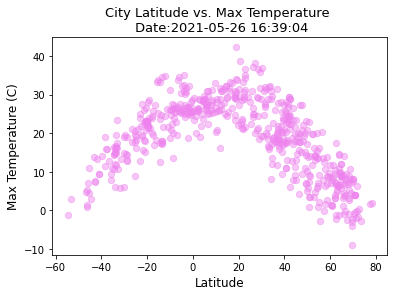

In [20]:
#plotting the scatter plot
date = datetime.utcfromtimestamp(int(clean_city['Date'][0])).strftime('%Y-%m-%d %H:%M:%S')
plt.scatter (clean_city['Latitude'], clean_city['Max Temperature'], color = 'violet', s = 40, alpha= 0.450)
plt.title(f'City Latitude vs. Max Temperature \n Date:{date}', fontsize=13)
plt.xlabel('Latitude', fontsize= 12)
plt.ylabel('Max Temperature (C)', fontsize=12)
plt.savefig('Images/City_Latitude_vs_Max_Temperature.png')
plt.show()


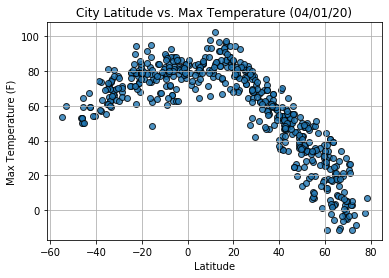

In [10]:
#Do not run 

## Latitude vs. Humidity Plot

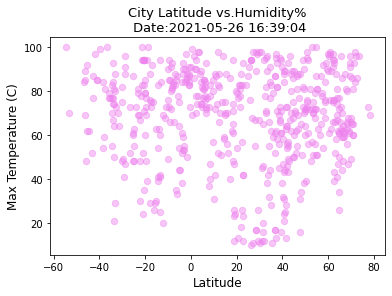

In [21]:
#plotting the scatter plot
date = datetime.utcfromtimestamp(int(clean_city['Date'][0])).strftime('%Y-%m-%d %H:%M:%S')
plt.scatter (clean_city['Latitude'], clean_city['Humidity %'], color = 'violet', s = 40, alpha= 0.450)
plt.title(f'City Latitude vs.Humidity%\n Date:{date}', fontsize=13)
plt.xlabel('Latitude', fontsize= 12)
plt.ylabel('Max Temperature (C)', fontsize=12)
plt.savefig('Images/City_Latitude_vs_Humidity.png')
plt.show()

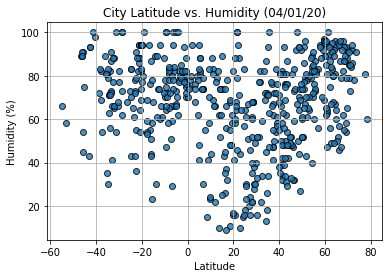

In [11]:
#Do not run 

## Latitude vs. Cloudiness Plot

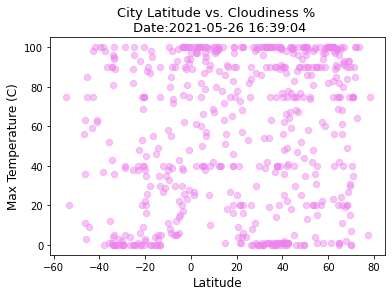

In [22]:
#plotting the scatter plot
date = datetime.utcfromtimestamp(int(clean_city['Date'][0])).strftime('%Y-%m-%d %H:%M:%S')
plt.scatter (clean_city['Latitude'], clean_city['Cloudiness %'], color = 'violet', s = 40, alpha= 0.450)
plt.title(f'City Latitude vs. Cloudiness % \n Date:{date}', fontsize=13)
plt.xlabel('Latitude', fontsize= 12)
plt.ylabel('Max Temperature (C)', fontsize=12)
plt.savefig('Images/City_Latitude_vs_Cloudiness.png')
plt.show()

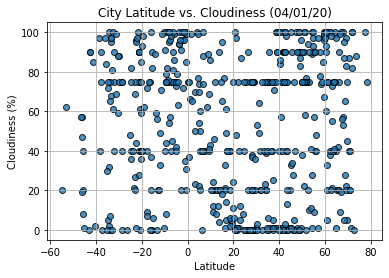

In [12]:
#Do not run

## Latitude vs. Wind Speed Plot

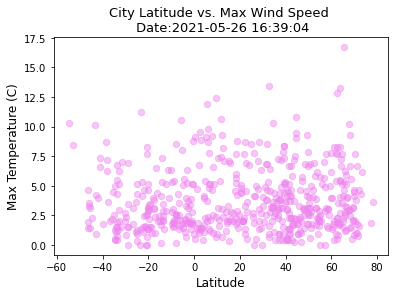

In [19]:
#plotting the scatter plot
date = datetime.utcfromtimestamp(int(clean_city['Date'][0])).strftime('%Y-%m-%d %H:%M:%S')
plt.scatter (clean_city['Latitude'], clean_city['Wind Speed (km/hr)'], color = 'violet', s = 40, alpha= 0.450)
plt.title(f'City Latitude vs. Max Wind Speed \n Date:{date}', fontsize=13)
plt.xlabel('Latitude', fontsize= 12)
plt.ylabel('Max Temperature (C)', fontsize=12)
plt.savefig('Images/City_Latitude_vs_Wind Speed_.png')
plt.show()

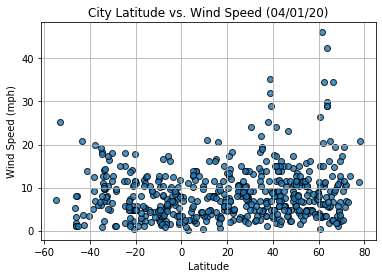

In [13]:
#Do not run 

## Linear Regression

In [42]:
def linear_regression (x_axis,y_axis,x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    fig,ax=plt.subplots()
    ax.scatter(x_axis,y_axis,color="violet")
    ax.plot(x_axis,regress_values,"r-")
    ax.annotate(line_eq,(x,y),fontsize=10,color="red")
    ax.annotate(f'r^2= {round(rvalue**2,2)}',(x,y-4),fontsize=10,color="red")

In [43]:
#Defyning the 2 hemispheres 
north_hemisphere= clean_city.loc[clean_city['Latitude']>0,:] 
south_hemisphere= clean_city.loc[clean_city['Latitude']<=0,:] 


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


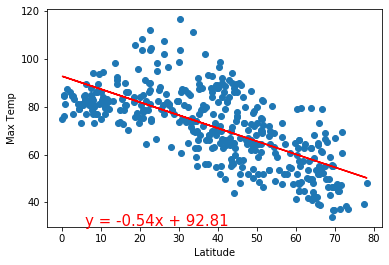

In [25]:
#Do not run 

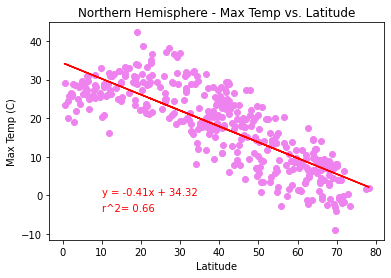

In [66]:

linear_regression(north_hemisphere['Latitude'],north_hemisphere['Max Temperature'],10,0)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.savefig('Images/Northern_Linearregression_Maxtemp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


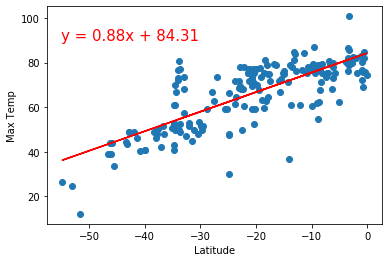

In [26]:
#Do not run 

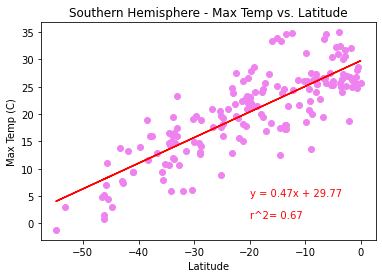

In [57]:
#Southern Max Temperature
linear_regression(south_hemisphere['Latitude'],south_hemisphere['Max Temperature'],-20,5)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.savefig('Images/Southern_Linearregression_MaxTemp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


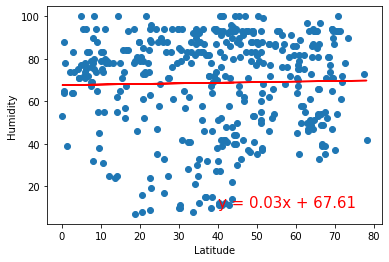

In [27]:
#Do not run 

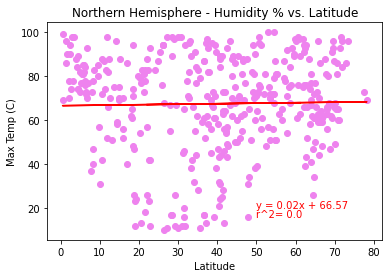

In [58]:
#northern Humidity %
linear_regression(north_hemisphere['Latitude'],north_hemisphere['Humidity %'],50,20)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title('Northern Hemisphere - Humidity % vs. Latitude')
plt.savefig('Images/Northern_Linearregression_humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


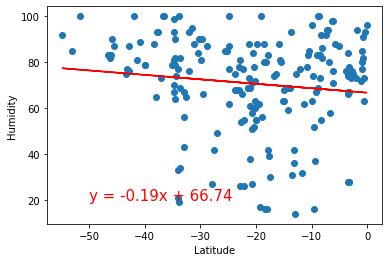

In [28]:
#Do not run 

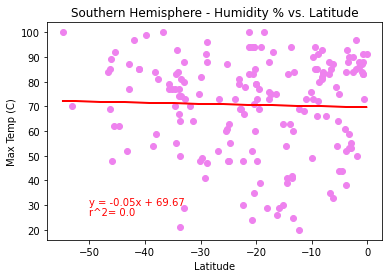

In [60]:
#Southern Humidity %
linear_regression(south_hemisphere['Latitude'],south_hemisphere['Humidity %'],-50,30)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title('Southern Hemisphere - Humidity % vs. Latitude')
plt.savefig('Images/Southern_Linearregression_Humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


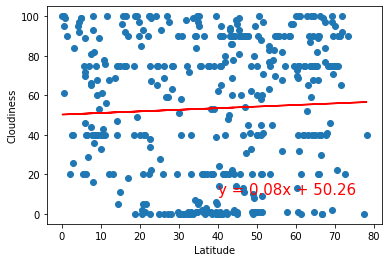

In [29]:
#Do not run 

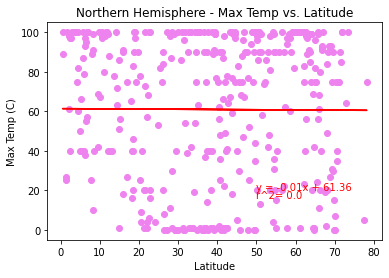

In [52]:
#Northern Cloudiness 
linear_regression(north_hemisphere['Latitude'],north_hemisphere['Cloudiness %'],50,20)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.savefig('Images/Northern_Linearregression_Cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


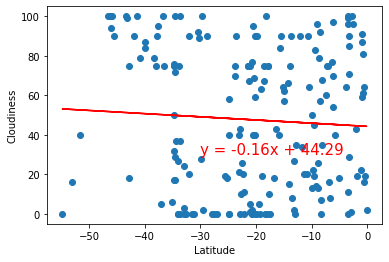

In [30]:
#Do not run 

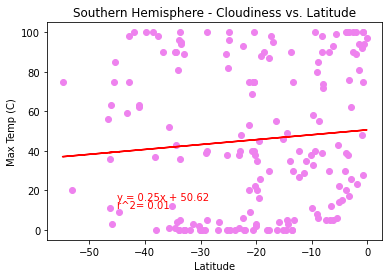

In [62]:
#Southern Cloudiness
linear_regression(south_hemisphere['Latitude'],south_hemisphere['Cloudiness %'],-45,15)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')
plt.savefig('Images/Southern_Linearregression_Cloudiness.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


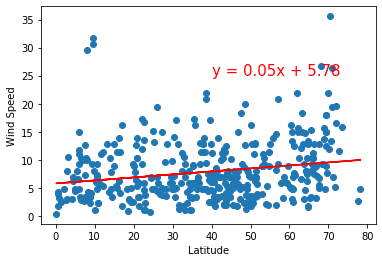

In [31]:
# Do not run 

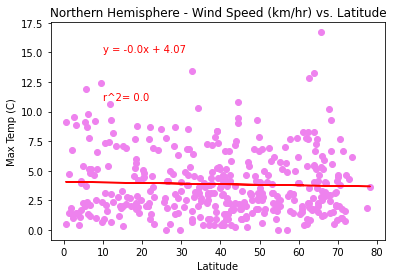

In [63]:
#Northern Windspeed 
linear_regression(north_hemisphere['Latitude'],north_hemisphere['Wind Speed (km/hr)'],10,15)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title('Northern Hemisphere - Wind Speed (km/hr) vs. Latitude')
plt.savefig('Images/Northern_Linearregression_Windspeed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


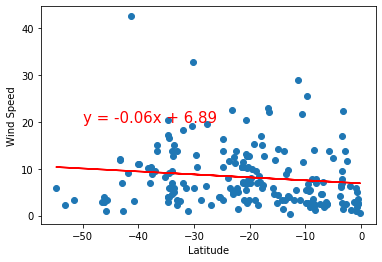

In [32]:
#Do not run 

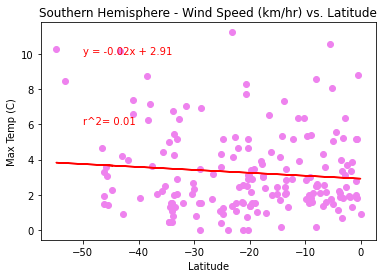

In [65]:
#Southern Windspeed
linear_regression(south_hemisphere['Latitude'],south_hemisphere['Wind Speed (km/hr)'],-50,10)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title('Southern Hemisphere - Wind Speed (km/hr) vs. Latitude')
plt.savefig('Images/Southern_Linearregression_windspeed.png')
plt.show()